# Python stats for CS5063

In [13]:
# set up pandas and scipy stats
import pandas as pd
from scipy import stats

# plot inline
%matplotlib inline

## Part 1: T-test using fake Amazon data (based on lecture)
T-Test checks if there is a statistically sigificant difference between the average (mean) values of two data sets
Example: Do users of Amazon's NEW recommendation system buy more books (on average) that users of the OLD system?

In [3]:
# read fake amazon data (large variation scenario)
# Change filename for your computer!
amazon = pd.read_csv("simpledatasets/fakeAmazonDataLargeVar.csv")

### Display and plot data

In [4]:
# print fake amazon data as a table
print(amazon)

      OLD     NEW
0   22.48   15.71
1   13.25   19.78
2   13.71  100.00
3   28.00   14.67
4   27.82   14.82
..    ...     ...
95  19.82   27.11
96  13.72   10.96
97  10.51   23.88
98  19.00   14.27
99  17.77   11.00

[100 rows x 2 columns]


In [8]:
# look just at first 5 rows
amazon.head()

,OLD,NEW
0,22.48,15.71
1,13.25,19.78
2,13.71,100.00
3,28.00,14.67
4,27.82,14.82


In [9]:
# look just at OLD
amazon['OLD']

0     22.48
1     13.25
2     13.71
3     28.00
4     27.82
      ...  
95    19.82
96    13.72
97    10.51
98    19.00
99    17.77
Name: OLD, Length: 100, dtype: float64

<AxesSubplot:>

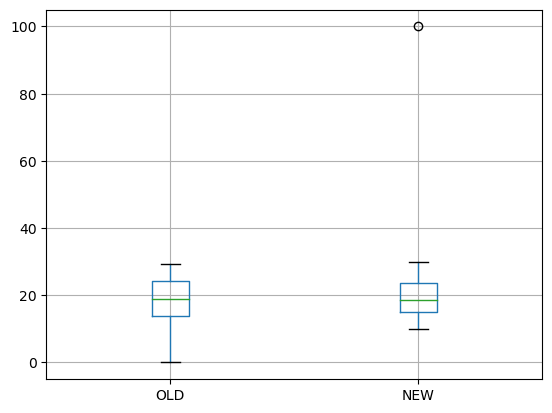

In [14]:
# boxplot the data
amazon.boxplot()

array([[<AxesSubplot:title={'center':'OLD'}>,
        <AxesSubplot:title={'center':'NEW'}>]], dtype=object)

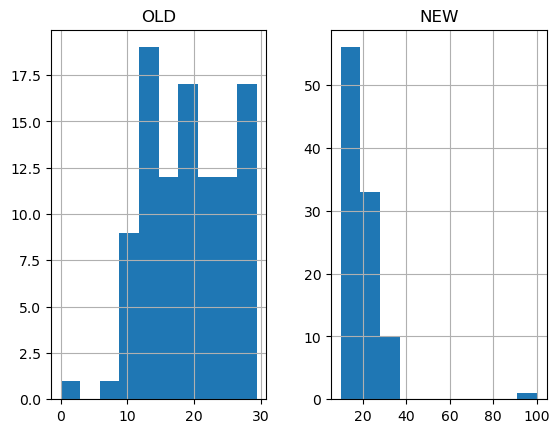

In [15]:
#histogram plot of the data
amazon.hist()

### Simple descriptive statistics

In [16]:
# mean (average) value
amazon.mean()

OLD    19.0035
NEW    20.0042
dtype: float64

In [17]:
#median (central) value
amazon.median()

OLD    18.77
NEW    18.48
dtype: float64

### Do T-tests

In [18]:
# t-test comparing OLD to NEW
# Is p-value less than 0.05
stats.ttest_ind(amazon['OLD'],amazon['NEW']) 

Ttest_indResult(statistic=-0.8646475760614669, pvalue=0.3882785719152384)

In [19]:
# 1-value t-test.  Is the mean of OLD (19.0035) signicantly different from 19?
stats.ttest_1samp(amazon['OLD'], 19)

Ttest_1sampResult(statistic=0.00568272204976676, pvalue=0.9954773036516025)

In [20]:
# paired t-test comparing OLD to NEW (not appropriate for this data, but show how it is done)
stats.ttest_rel(amazon['OLD'],amazon['NEW'])

Ttest_relResult(statistic=-0.874899574504673, pvalue=0.3837461652644054)

In [21]:
# Shapiro test - does OLD follow normal distribution
stats.shapiro(amazon['OLD'])

ShapiroResult(statistic=0.9584576487541199, pvalue=0.0031264598947018385)

In [22]:
# Mann Whitney comparing OLD to NEW
# Makes sense to use this when Shapiro p-valye is low (ie, data is not normally distributed)
stats.mannwhitneyu(amazon['OLD'],amazon['NEW'])

MannwhitneyuResult(statistic=4889.5, pvalue=0.788103457128261)

### Exercise: repeat above for fakeAmazonModerateVar
This is the data set with moderate variatio, should see lower p values

In [39]:
famazonMod = pd.read_csv("simpledatasets/fakeAmazonDataModerateVar.csv")
famazonMod.head()

,OLD,NEW
0,19.62,15.86
1,16.74,35.79
2,19.21,18.92
3,16.84,23.95
4,13.83,24.59


<AxesSubplot:>

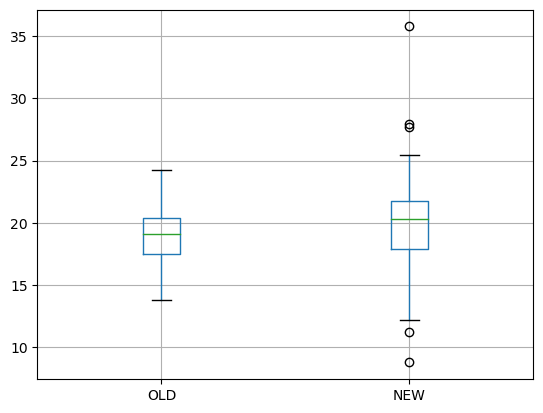

In [40]:
# boxplot the data
famazonMod.boxplot()

array([[<AxesSubplot:title={'center':'OLD'}>,
        <AxesSubplot:title={'center':'NEW'}>]], dtype=object)

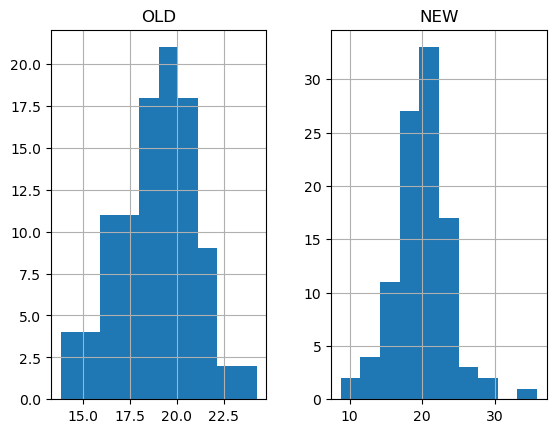

In [41]:
#histogram plot of the data
famazonMod.hist()

### Simple descriptive statistics

In [42]:
# mean (average) value
famazonMod.mean()

OLD    18.9991
NEW    19.9957
dtype: float64

In [43]:
#median (central) value
famazonMod.median()

OLD    19.085
NEW    20.310
dtype: float64

### Do T-tests

In [49]:
# t-test comparing OLD to NEW
# Is p-value less than 0.05
stats.ttest_ind(famazonMod['OLD'],famazonMod['NEW'])

Ttest_indResult(statistic=-2.3099741707729646, pvalue=0.021920349632744505)

In [50]:
# 1-value t-test.  Is the mean of OLD (19.0035) signicantly different from 19?
stats.ttest_1samp(famazonMod['OLD'], 19)

Ttest_1sampResult(statistic=-0.004286803239046196, pvalue=0.9965882627006943)

In [51]:
# paired t-test comparing OLD to NEW (not appropriate for this data, but show how it is done)
stats.ttest_rel(famazonMod['OLD'],famazonMod['NEW'])

Ttest_relResult(statistic=-2.17509376441695, pvalue=0.03200413349488799)

In [52]:
# Shapiro test - does OLD follow normal distribution
stats.shapiro(famazonMod['OLD'])

ShapiroResult(statistic=0.9916341304779053, pvalue=0.7941339612007141)

In [53]:
# Mann Whitney comparing OLD to NEW
# Makes sense to use this when Shapiro p-valye is low (ie, data is not normally distributed)
stats.mannwhitneyu(famazonMod['OLD'],famazonMod['NEW'])

MannwhitneyuResult(statistic=3995.5, pvalue=0.014159949379532879)

## Chi-square test
Is there a statistically signicant difference in two sets of categorical values
Example: Are MSc students more likely to be non-UK than undergraduate students?  (Data from several years ago)

In [23]:
# read nationality data
nationality = pd.read_csv("simpledatasets/nationality.csv")
nationality

,Degree,UK,non-UK
0,MSc,9,25
1,UG,115,56


In [54]:
# chi-square test (p-value is second number)
nationality2 = nationality.drop(columns=['Degree'])
# nationality2
stats.chi2_contingency(nationality2)

(18.065487966637885,
 2.1343529350002643e-05,
 1,
 array([[ 20.56585366,  13.43414634],
        [103.43414634,  67.56585366]]))

In [25]:
# fisher test (p-value is second number)
# use this for 2x2 test if size of sets is small
stats.fisher_exact(nationality2)

(0.17530434782608695, 1.4150392340008172e-05)

### Exercise: Was there a significant difference in Remain/Leave (Brexit) votes in Scotland and England?
The data is available at below Wikipedia site.  You should create a CSV with the relevant data and do a chi-square test, as above

https://en.wikipedia.org/wiki/Results_of_the_2016_United_Kingdom_European_Union_membership_referendum

In [36]:
votes_df = pd.read_csv("simpledatasets/votes.csv")
votes_df

,Region,Remain Votes,Leave Votes
0,Scotland,1661191,1018322
1,England,13247674,15187583


In [37]:
votes_df2 = votes_df.drop(columns=['Region'])
# votes_df2
stats.chi2_contingency(votes_df2)

(232917.728557373,
 0.0,
 1,
 array([[ 1283907.85413953,  1395605.14586047],
        [13624957.14586047, 14810299.85413953]]))

### Binomial test
Is the distribution of categories in a set statistically different from 50-50?
Example: If we flip a coin 20 times and get 7 heads, does this prove the coin is biased?

In [26]:
# binomial test - If we flip coin 20 times and get 7 heads, does this mean the coin is probably biased?
stats.binomtest(7,20)

BinomTestResult(k=7, n=20, alternative='two-sided', proportion_estimate=0.35, pvalue=0.26317596435546875)

### Exercise: Which coin-flip results suggest a coin is biased?
If we flip a coin 20 times and get 6 heads, is this statistically significant evidence that the coin is biased?  What if we got 5 heads? 4 head?  etc.  What if we get 20 heads?

In [56]:
print(stats.binomtest(6,20)) # biased
print(stats.binomtest(5,20))
print(stats.binomtest(4,20)) # biased
print(stats.binomtest(20,20)) # biased coin

BinomTestResult(k=6, n=20, alternative='two-sided', proportion_estimate=0.3, pvalue=0.11531829833984375)
BinomTestResult(k=5, n=20, alternative='two-sided', proportion_estimate=0.25, pvalue=0.04138946533203125)
BinomTestResult(k=4, n=20, alternative='two-sided', proportion_estimate=0.2, pvalue=0.01181793212890625)
BinomTestResult(k=20, n=20, alternative='two-sided', proportion_estimate=1.0, pvalue=1.9073486328125e-06)


## Correlation
Are the values in one set of numbers correlated with another?  Ie, do they change in similar ways?
Example: Is global average temperature correlated with atmospheric CO2?

In [57]:
# read CO2 data
# temp is difference from 20th century average
co2 = pd.read_csv("simpledatasets/co2.csv")

In [59]:
co2.head()

,Year,Temp,CO2
0,1959,0.0596,315.97
1,1960,0.0204,316.91
2,1961,0.0775,317.64
3,1962,0.0888,318.45
4,1963,0.1068,318.99


<AxesSubplot:>

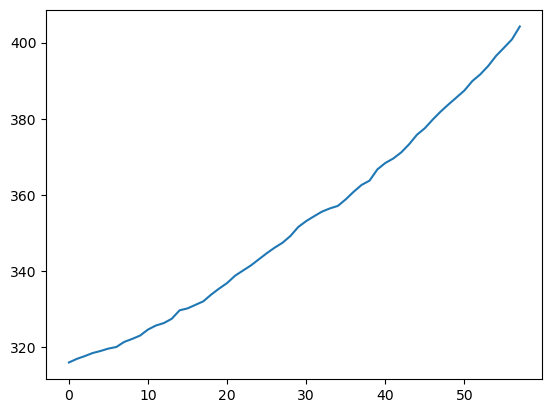

In [60]:
# plot CO2
co2['CO2'].plot()

<AxesSubplot:>

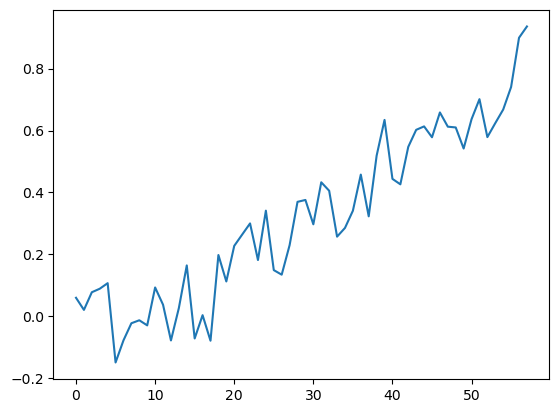

In [61]:
# plot temperature
co2['Temp'].plot()

In [62]:
# are temperatires correlated with CO2?
# first number is corr coef (1 means perfect corr), second number is p value
stats.pearsonr(co2['CO2'], co2['Temp'])

PearsonRResult(statistic=0.9473149530016225, pvalue=2.2909778887844224e-29)

In [63]:
# same with Spearman correlation
# are temperatires correlated with CO2?
# first number is corr coef (1 means perfect corr), second number is p value
stats.spearmanr(co2['CO2'], co2['Temp'])

SpearmanrResult(correlation=0.9324494755298534, pvalue=1.976046608416543e-26)

### Exercise: Are rising sea levels correlated with increasing atmospheric CO2?
You can get seal level data from https://datahub.io/core/sea-level-rise (I suggest you use EPA)
You will need to merge this data with the data in co2.csv

In [64]:
epa_df = pd.read_csv("simpledatasets/epa-sea-level_csv.csv")

In [65]:
epa_df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880-03-15,0.000000,-0.952756,0.952756,NaN
1,1881-03-15,0.220472,-0.732283,1.173228,NaN
2,1882-03-15,-0.440945,-1.346457,0.464567,NaN
3,1883-03-15,-0.232283,-1.129921,0.665354,NaN
4,1884-03-15,0.590551,-0.283465,1.464567,NaN


In [71]:
co2_epa_df = pd.concat([co2, epa_df])
co2_epa_df

,Year,Temp,CO2,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1959,0.0596,315.97,NaN,NaN,NaN,NaN
1,1960,0.0204,316.91,NaN,NaN,NaN,NaN
2,1961,0.0775,317.64,NaN,NaN,NaN,NaN
3,1962,0.0888,318.45,NaN,NaN,NaN,NaN
4,1963,0.1068,318.99,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
130,2010-03-15,NaN,NaN,8.901575,8.618110,9.185039,8.122973
131,2011-03-15,NaN,NaN,8.964567,8.661417,9.267717,8.053065
132,2012-03-15,NaN,NaN,9.326772,8.992126,9.661417,8.457058
133,2013-03-15,NaN,NaN,8.980315,8.622047,9.338583,8.546648


In [73]:
# # pandas merge
# co2_epa_df = pd.merge(co2, epa_df, on='Year')
# co2_epa_df

# pandas correlation


,Temp,CO2,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
Temp,1.000000,0.947315,NaN,NaN,NaN,NaN
CO2,0.947315,1.000000,NaN,NaN,NaN,NaN
CSIRO Adjusted Sea Level,NaN,NaN,1.000000,0.999132,0.998848,0.976708
Lower Error Bound,NaN,NaN,0.999132,1.000000,0.995980,0.976050
Upper Error Bound,NaN,NaN,0.998848,0.995980,1.000000,0.977029
NOAA Adjusted Sea Level,NaN,NaN,0.976708,0.976050,0.977029,1.000000
